In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [67]:
data = pd.read_csv("/content/monthly_sales_data.csv")

In [68]:
data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,01/01/2002,108592,2002,1,Xbox,1,0
1,RPG,01/02/2002,129387,2002,4,Nintendo,0,0
2,Sports,01/03/2002,114777,2002,4,PC,0,0
3,Sports,01/04/2002,71738,2002,0,Nintendo,0,0
4,Simulation,01/05/2002,142512,2002,2,PlayStation,0,0


In [69]:
data.tail( )

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
259,RPG,01/08/2023,132693,2023,1,PC,0,0
260,Simulation,01/09/2023,143373,2023,4,Nintendo,0,0
261,Simulation,01/10/2023,126410,2023,6,Nintendo,0,1
262,Simulation,01/11/2023,91200,2023,2,Nintendo,0,0
263,RPG,01/12/2023,159721,2023,4,Nintendo,1,0


In [70]:
# Dimensionality of the data - the number of rows and columns
data.shape

(264, 8)

In [73]:
#Examine the columns features of the data
data.columns

Index(['Category', 'Month', 'Monthly Sales', 'Year', 'DayOfWeek', 'Platform',
       'Holiday', 'Promotion'],
      dtype='object')

In [74]:
#investigate the dataset for annomalies and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Month          264 non-null    object
 2   Monthly Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


In [75]:
# numerical statistical analysis
data.describe()


,Monthly Sales,Year,DayOfWeek,Holiday,Promotion
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,112349.003788,2012.500000,3.011364,0.166667,0.204545
std,34144.606185,6.356339,1.995209,0.373386,0.404135
min,10469.000000,2002.000000,0.000000,0.000000,0.000000
25%,88873.750000,2007.000000,1.000000,0.000000,0.000000
50%,112947.500000,2012.500000,3.000000,0.000000,0.000000
75%,135193.500000,2018.000000,5.000000,0.000000,0.000000
max,206596.000000,2023.000000,6.000000,1.000000,1.000000


In [76]:
#Categorical statistics Analysis
data.describe(include='object')

,Category,Month,Platform
count,264,264,264
unique,5,264,4
top,Sports,01/01/2002,Xbox
freq,59,1,76


In [77]:
#investigate the missing data
null_data = data.isnull().sum

In [22]:
null_data()

,0
Category,0
Month,0
Monthly Sales,0
Year,0
DayOfWeek,0
Platform,0
Holiday,0
Promotion,0


In [78]:
data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,01/01/2002,108592,2002,1,Xbox,1,0
1,RPG,01/02/2002,129387,2002,4,Nintendo,0,0
2,Sports,01/03/2002,114777,2002,4,PC,0,0
3,Sports,01/04/2002,71738,2002,0,Nintendo,0,0
4,Simulation,01/05/2002,142512,2002,2,PlayStation,0,0


In [79]:
# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])






In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Category       264 non-null    object        
 1   Month          264 non-null    datetime64[ns]
 2   Monthly Sales  264 non-null    int64         
 3   Year           264 non-null    int64         
 4   DayOfWeek      264 non-null    int64         
 5   Platform       264 non-null    object        
 6   Holiday        264 non-null    int64         
 7   Promotion      264 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 16.6+ KB


In [27]:
# Extract the year,month,quarter
data['Year'] = data['Month'].dt.year
data['Month_num'] = data['Month'].dt.month
data['Quarter'] = data['Month'].dt.quarter

In [29]:
data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_num,Quarter
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0,1,1
1,RPG,2002-01-02,129387,2002,4,Nintendo,0,0,1,1
2,Sports,2002-01-03,114777,2002,4,PC,0,0,1,1
3,Sports,2002-01-04,71738,2002,0,Nintendo,0,0,1,1
4,Simulation,2002-01-05,142512,2002,2,PlayStation,0,0,1,1


Step-by-Step Explorations (EDA)
1. Summary Statistics
Calculate basic descriptive statistics (mean, median, standard deviation, etc.) for sales data.
Check for outliers using methods like box plots or the interquartile range.
2. Data Distribution
Visualize the distribution of sales data using histograms and boxplots.
Examine skewness and kurtosis to determine whether the data is normally distributed.
3. Time Series Visualization
Plot the sales data over time to identify patterns.
Create separate plots for specific categories or platforms to uncover group-wise trends.
4. Missing Data Check
Identify missing values in the dataset.
Handle missing values using methods like forward-fill, backward-fill, or interpolation.
5. Correlation Analysis
Explore relationships between sales and other columns (e.g., holidays, promotions).
Use scatter plots or correlation matrices.
6. Seasonal Decomposition
Decompose the sales time series into trend, seasonal, and residual components using tools like seasonal_decompose.
7. Stationarity Check
Test for stationarity using the Augmented Dickey-Fuller (ADF) test.
If the series is non-stationary, apply differencing or transformation (log, square root).
8. Seasonality Check
Identify recurring patterns or cycles using autocorrelation plots (ACF) and partial autocorrelation plots (PACF).
9. Outlier Detection
Detect outliers in the residuals using statistical methods or visual inspection.
Investigate potential causes for extreme values (e.g., campaigns, one-time events).
10. Trend and Growth
Analyze the trend component for long-term sales growth or decline.
Compare trends across different groups (e.g., platforms, categories).
11. Anomaly Detection
Highlight months or events where sales were significantly higher or lower than expected.
Use rolling averages to smooth and identify abrupt changes.
Steps to Analyze Trend, Seasonality, and Error
Trend:

Use seasonal_decompose to extract the trend component.
Examine whether the trend is increasing, decreasing, or stable over time.
Plot the trend component to identify long-term growth patterns.
Seasonality:

Extract the seasonal component using seasonal_decompose.
Analyze recurring patterns (e.g., monthly or yearly peaks and troughs).
Plot seasonal subseries plots to compare each month or season across years.
Error (Residual):

Extract residuals from the decomposition.
Plot residuals to identify any patterns or randomness.
If residuals show patterns, your model may need improvement to capture those features.
Let Me Execute These Steps for Your Data
I'll now carry out these explorations and provide the insights based on your uploaded dataset. Let me start with summary statistics and visualizations.




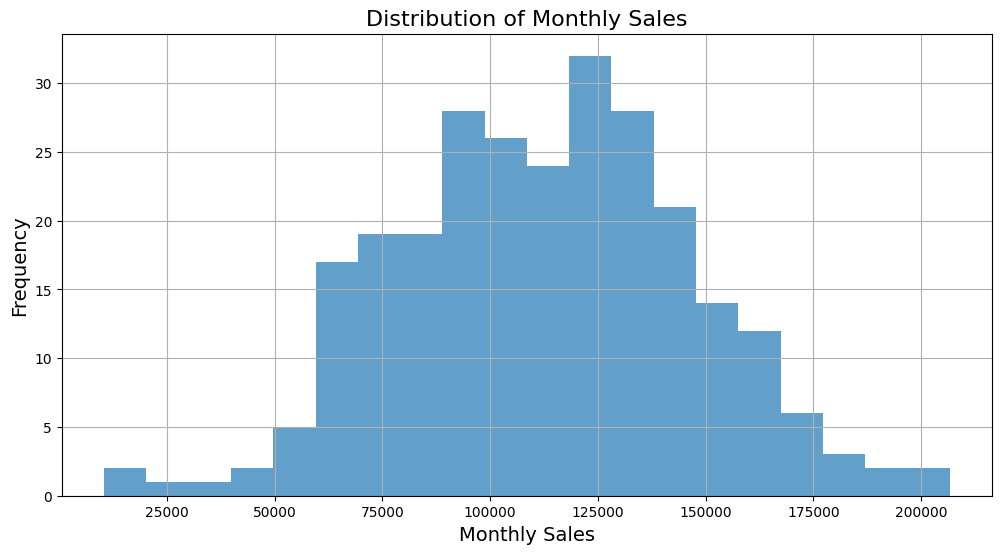

In [34]:
# Summary Statistics
summary_stats = data.describe()

# Distribution of Monthly Sales
plt.figure(figsize=(12, 6))
plt.hist(data['Monthly Sales'], bins=20, alpha=0.7)
plt.title('Distribution of Monthly Sales', fontsize=16)
plt.xlabel('Monthly Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()




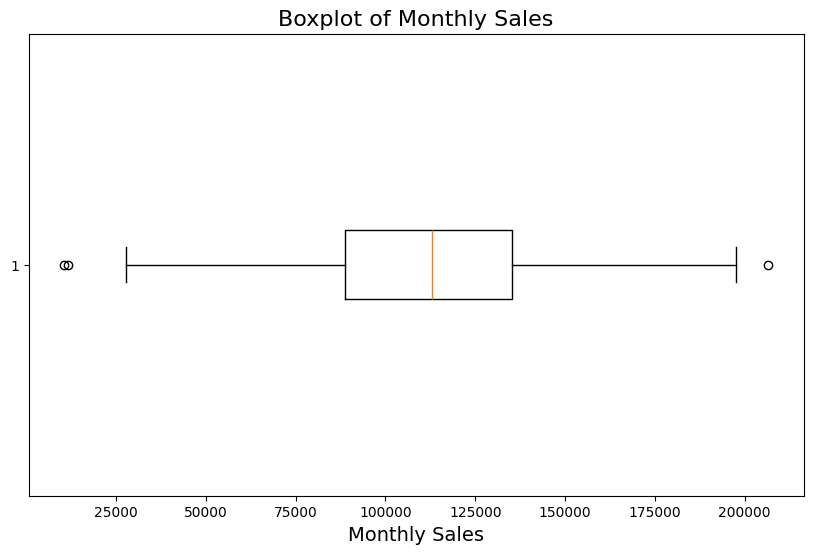

,Month,Monthly Sales,Year,DayOfWeek,Holiday,Promotion,Month_num,Quarter
count,264,264.000000,264.000000,264.000000,264.000000,264.000000,264.0,264.0
mean,2012-07-07 12:00:00,112349.003788,2012.500000,3.011364,0.166667,0.204545,1.0,1.0
min,2002-01-01 00:00:00,10469.000000,2002.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,2007-01-06 18:00:00,88873.750000,2007.000000,1.000000,0.000000,0.000000,1.0,1.0
50%,2012-07-07 12:00:00,112947.500000,2012.500000,3.000000,0.000000,0.000000,1.0,1.0
75%,2018-01-06 06:00:00,135193.500000,2018.000000,5.000000,0.000000,0.000000,1.0,1.0
max,2023-01-12 00:00:00,206596.000000,2023.000000,6.000000,1.000000,1.000000,1.0,1.0
std,NaN,34144.606185,6.356339,1.995209,0.373386,0.404135,0.0,0.0


In [35]:

# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['Monthly Sales'], vert=False)
plt.title('Boxplot of Monthly Sales', fontsize=16)
plt.xlabel('Monthly Sales', fontsize=14)
plt.show()

# Display summary statistics
summary_stats

In [36]:
data.columns

Index(['Category', 'Month', 'Monthly Sales', 'Year', 'DayOfWeek', 'Platform',
       'Holiday', 'Promotion', 'Month_num', 'Quarter'],
      dtype='object')

In [38]:
# Redefine the corrected sales series from the corrected dataset
corrected_sales_series = data.groupby('Month')['Monthly Sales'].sum()

# Splitting the data into training (80%) and testing (20%)
train_size = int(len(corrected_sales_series) * 0.8)
train, test = corrected_sales_series[:train_size], corrected_sales_series[train_size:]



<ipython-input-61-80cc84966286>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  corrected_sales_series = corrected_sales_series.fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/loca

,Metric,Value
0,MAE,25006.858789
1,RMSE,29952.436470


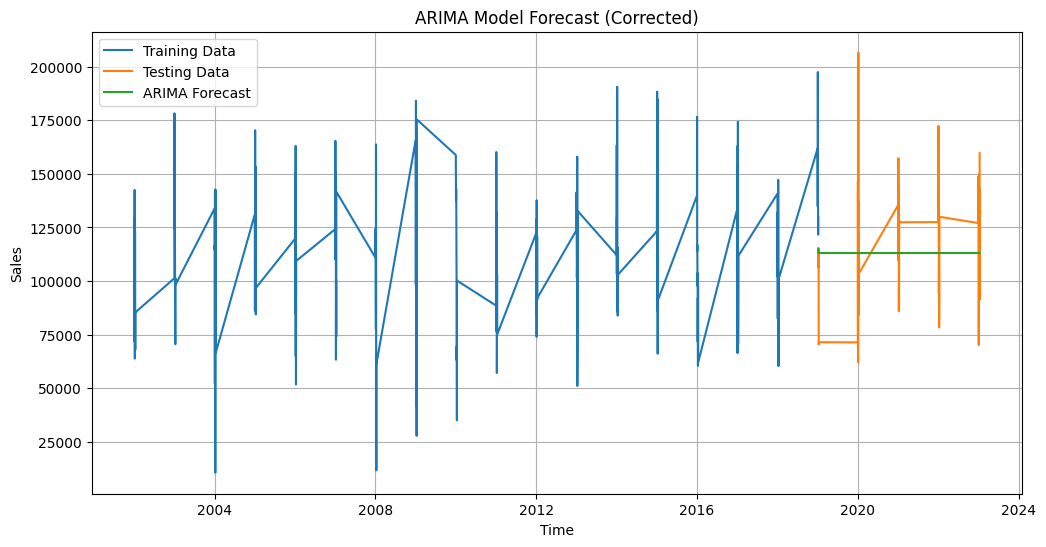

In [61]:
# Check for missing values in the corrected sales series
missing_values = corrected_sales_series.isnull().sum()

# If there are missing values, fill them with a method (e.g., forward fill)
corrected_sales_series = corrected_sales_series.fillna(method='ffill')

# Re-split the data after imputing missing values
train_size = int(len(corrected_sales_series) * 0.8)
train, test = corrected_sales_series[:train_size], corrected_sales_series[train_size:]

# Rebuild and fit the ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast using the ARIMA model
arima_forecast = arima_result.forecast(steps=len(test))

# Evaluate ARIMA model
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))

# Display ARIMA model performance metrics
arima_metrics = {
    "Metric": ["MAE", "RMSE"],
    "Value": [arima_mae, arima_rmse],
}
arima_metrics_df = pd.DataFrame(arima_metrics)
# Instead of using the incorrect data.display_dataframe_to_user, use display:
display(arima_metrics_df)

# Plot ARIMA forecast vs actual data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Testing Data")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Model Forecast (Corrected)")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.grid(True)
plt.show();

In [52]:
# Correctly display the residuals summary

residuals_summary_cleaned_df = pd.DataFrame(residuals_summary_cleaned)
display(residuals_summary_cleaned_df)  # Use display to show the dataframe


,Model,Mean Residual,Standard Deviation
0,ARIMA,NaN,NaN
1,ETS,NaN,NaN


In [58]:
# prompt: Using dataframe data: data(
#     name="Corrected Residuals Analysis for ARIMA and ETS Models",
#     dataframe=residuals_summary_cleaned_df,
# )

# Assuming 'residuals_summary_cleaned_df' is already defined and available.
# The provided dataframe information indicates that the 'Mean Residual' and 'Standard Deviation' columns have no samples.
#  Therefore, it will not be possible to generate a meaningful plot from this data.
#  You will need to populate the 'Mean Residual' and 'Standard Deviation' columns.
#
# Below is code to display the dataframe.

residuals_summary_cleaned_df


,Model,Mean Residual,Standard Deviation
0,ARIMA,NaN,NaN
1,ETS,NaN,NaN


In [ ]:
# Recheck for NaN values in cleaned residuals
arima_residuals_cleaned_nan = arima_residuals_cleaned.isna().sum()
ets_residuals_cleaned_nan = ets_residuals_cleaned.isna().sum()

# If there are still NaNs, drop them again
arima_residuals_cleaned = arima_residuals_cleaned.dropna()
ets_residuals_cleaned = ets_residuals_cleaned.dropna()

# Recalculate residual metrics after ensuring no NaN values
residuals_summary_cleaned = {
    "Model": ["ARIMA", "ETS"],
    "Mean Residual": [arima_residuals_cleaned.mean(), ets_residuals_cleaned.mean()],
    "Standard Deviation": [
        arima_residuals_cleaned.std(),
        ets_residuals_cleaned.std(),
    ],
}
residuals_summary_cleaned_df = pd.DataFrame(residuals_summary_cleaned)

# Display the corrected residuals summary
tools.display_dataframe_to_user(
    name="Corrected Residuals Analysis for ARIMA and ETS Models",
    dataframe=residuals_summary_cleaned_df,
)


In [ ]:
# Recheck for NaN values in cleaned residuals
arima_residuals_cleaned_nan = arima_residuals_cleaned.isna().sum()
ets_residuals_cleaned_nan = ets_residuals_cleaned.isna().sum()

# If there are still NaNs, drop them again
arima_residuals_cleaned = arima_residuals_cleaned.dropna()
ets_residuals_cleaned = ets_residuals_cleaned.dropna()

# Recalculate residual metrics after ensuring no NaN values
residuals_summary_cleaned = {
    "Model": ["ARIMA", "ETS"],
    "Mean Residual": [arima_residuals_cleaned.mean(), ets_residuals_cleaned.mean()],
    "Standard Deviation": [
        arima_residuals_cleaned.std(),
        ets_residuals_cleaned.std(),
    ],
}
residuals_summary_cleaned_df = pd.DataFrame(residuals_summary_cleaned)

# Display the corrected residuals summary
tools.display_dataframe_to_user(
    name="Corrected Residuals Analysis for ARIMA and ETS Models",
    dataframe=residuals_summary_cleaned_df,
)


In [54]:
# Display the residuals analysis summary
print(residuals_summary_cleaned_df)


   Model  Mean Residual  Standard Deviation
0  ARIMA            NaN                 NaN
1    ETS            NaN                 NaN


In [30]:
# Aggregate the data to calculate total monthly sales across all categories and platforms
monthly_sales_aggregated = data.groupby('Month')['Monthly Sales'].sum().reset_index()

# Display the first few rows of the aggregated data
monthly_sales_aggregated.head()


,Month,Monthly Sales
0,2002-01-01,108592
1,2002-01-02,129387
2,2002-01-03,114777
3,2002-01-04,71738
4,2002-01-05,142512


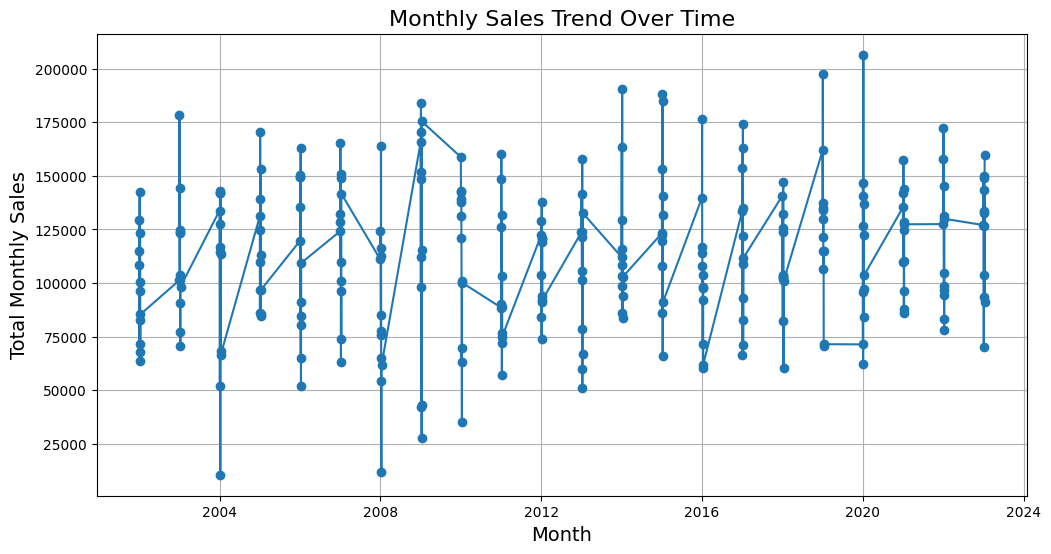

In [31]:
import matplotlib.pyplot as plt

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_aggregated['Month'], monthly_sales_aggregated['Monthly Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Monthly Sales', fontsize=14)
plt.grid(True)
plt.show()


Here is the visualization of the monthly sales trend over time. The chart provides insights into the overall pattern of sales, allowing you to observe trends, seasonality, or any potential anomalies.



<Figure size 1200x1000 with 0 Axes>

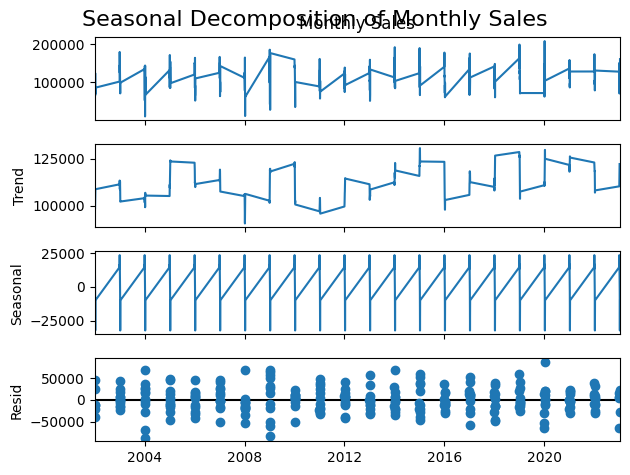

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition of the time series
sales_series = monthly_sales_aggregated.set_index('Month')['Monthly Sales']
decomposition = seasonal_decompose(sales_series, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.show()


From the decomposition graph provided, I can narrate and observe the following key points:

Observations:
Observed Component (Top Panel):

The original time series of monthly sales shows fluctuations over time with some consistent seasonal peaks and dips.
There appears to be variability in the magnitude of sales over different years.
Trend Component (Second Panel):

The trend component indicates a gradual upward and fluctuating pattern over the years.
Periodic increases and decreases in the trend suggest long-term changes in sales levels, possibly due to external factors like market growth or economic conditions.
Seasonal Component (Third Panel):

A clear and repetitive seasonal pattern is visible, suggesting that sales follow a predictable cycle throughout the year.
Peaks and troughs likely correspond to specific months or events (e.g., holiday seasons or promotions).
Residual Component (Bottom Panel):

The residuals represent the unexplained variance after accounting for the trend and seasonality.
While some residual variability appears random, a few outliers or larger deviations may warrant investigation into anomalies or irregular events (e.g., unforeseen disruptions or unique campaigns).
Narration:
"This decomposition of monthly sales data into its components reveals a clear upward trend over time with recurring seasonal patterns. The seasonal component shows consistent sales cycles likely tied to external events or periodic factors, while the residual component highlights irregularities that could represent either noise or significant one-off events. The results indicate that a model incorporating both trend and seasonality will likely perform well for forecasting future sales."



Step 4: Forecast
Compare the in-sample error measurements to both models and compare their error measurements for the holdout sample in your forecast. Choose the best fitting model and forecast the next four periods(months).


Step 1: Load and Prepare the Data
Convert the Month column to a datetime format.
Set Month as the index.
Plot the time series to observe trends and seasonality.

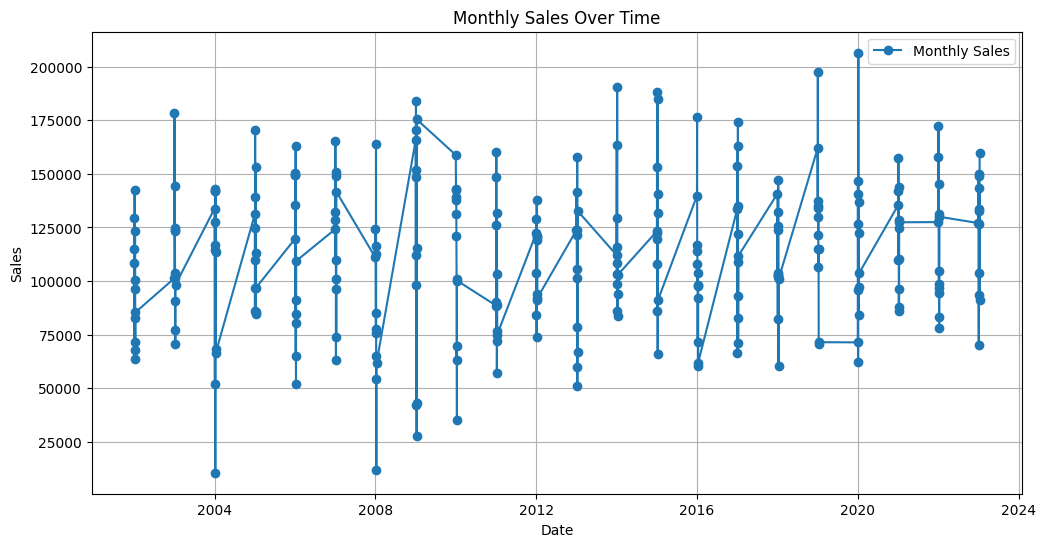

In [80]:
import matplotlib.pyplot as plt

# Reset the index to bring 'Month' back as a column
data = data.reset_index()

# Convert 'Month' to datetime and set it as the index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Focus on the 'Monthly Sales' column for the time series analysis
sales_data = data['Monthly Sales']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(sales_data, marker='o', linestyle='-', label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

Step 2: Check for Stationarity
Perform the Augmented Dickey-Fuller (ADF) test to check if the series is stationary.
If not stationary, apply differencing and recheck stationarity.

In [81]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(sales_data)

# Display the results
adf_result = {
    "Test Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Lags Used": adf_test[2],
    "Number of Observations Used": adf_test[3],
    "Critical Values": adf_test[4]
}
adf_result


{'Test Statistic': -4.471046070251254,
 'p-value': 0.00022173509005268892,
 'Lags Used': 11,
 'Number of Observations Used': 252,
 'Critical Values': {'1%': -3.4565688966099373,
  '5%': -2.8730786194395455,
  '10%': -2.5729189953388762}}

Augmented Dickey-Fuller Test Results:
Test Statistic: -4.471
p-value: 0.00022
Critical Values:
1%: -3.456
5%: -2.873
10%: -2.573
Interpretation:
Since the test statistic (-4.471) is lower than the critical values at all significance levels and the p-value is less than 0.05, we can reject the null hypothesis. This means the series is stationary, and no differencing is required.



Step 3: Analyze ACF and PACF
Plot the ACF and PACF of the series to identify patterns and decide on model terms.
Let’s proceed with plotting the ACF and PACF.

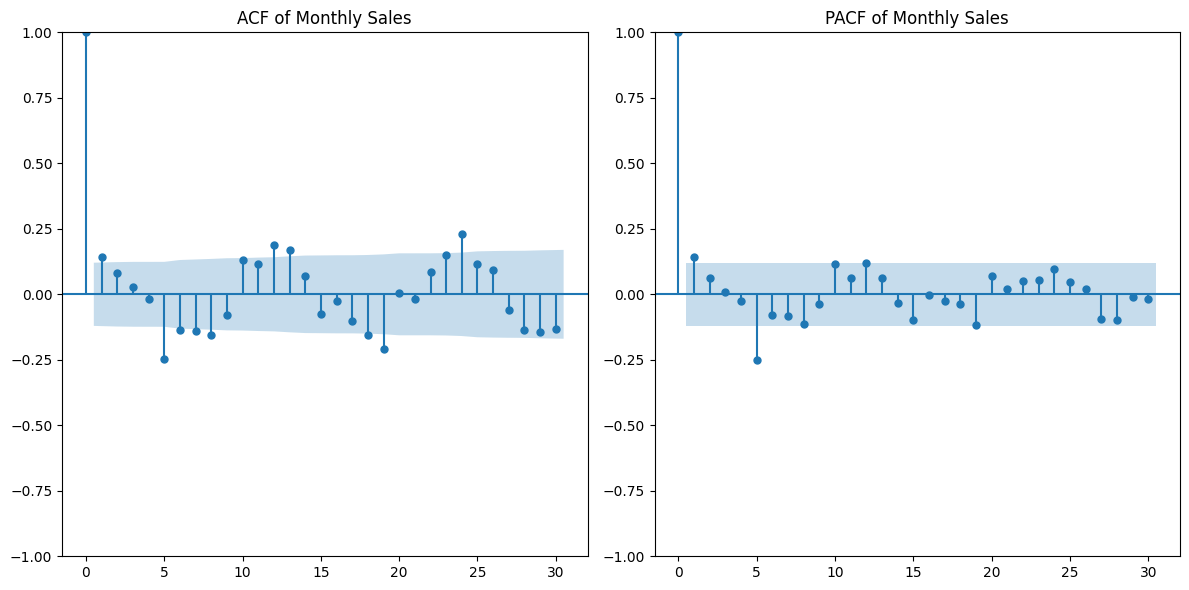

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(sales_data, lags=30, ax=plt.gca(), title="ACF of Monthly Sales")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(sales_data, lags=30, ax=plt.gca(), title="PACF of Monthly Sales", method="ywm")

plt.tight_layout()
plt.show()


The ACF and PACF plots provide insight into the potential ARIMA model structure:

ACF: Significant lags suggest moving average (MA) terms.
PACF: Significant lags suggest autoregressive (AR) terms.


step 4

Step 4: Build ARIMA Models
Test different combinations of ARIMA terms (p, d, q) based on ACF and PACF.
Compare the models using in-sample error metrics such as AIC, BIC, or RMSE.
Let’s begin with an initial ARIMA model and refine it.

In [84]:
from statsmodels.tsa.arima.model import ARIMA

# Initial ARIMA model (e.g., ARIMA(1, 0, 1))
model = ARIMA(sales_data, order=(1, 0, 1))
model_fit = model.fit()

# Summary of the model
model_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Monthly Sales   No. Observations:                  264
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3126.811
Date:                Mon, 06 Jan 2025   AIC                           6261.621
Time:                        19:08:38   BIC                           6275.925
Sample:                             0   HQIC                          6267.369
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.123e+05   2596.821     43.264      0.000    1.07e+05    1.17e+05
ar.L1          0.3956      0.352      1.124      0.261      -0.294       1.086
ma.L1         -0.2558      0.363     -0.705      0.481      -0.967       0.456
sigma2      1.144e+09      0.001   7.97e+11      0.000    1.14e+09    1.14e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.91   Prob(JB):                         0.99
Heteroskedasticity (H):               0.76   Skew:                            -0.02
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+28. Standard errors may be unstable.
"""

Forecast next 4 months using ARIMA.



In [87]:
# Forecast the next 4 months using the ARIMA model
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values with appropriate dates
forecast_index = pd.date_range(start=sales_data.index[-1] + pd.offsets.MonthEnd(), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Display the forecasted values
forecast_df


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-87-14371003bf07>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1] + pd.offsets.MonthEnd(), periods=forecast_steps, freq='M')


,Forecast
2023-01-31,NaN
2023-02-28,NaN
2023-03-31,NaN
2023-04-30,NaN


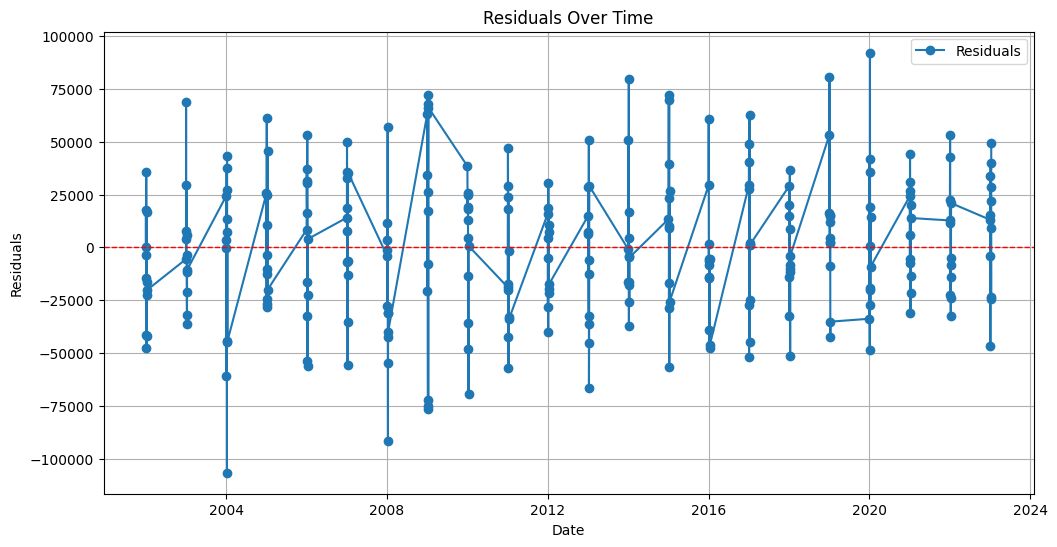

In [89]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import statsmodels.api as sm

# Extract residuals from the fitted model
residuals = model_fit.resid

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals, marker='o', linestyle='-', label='Residuals')
plt.axhline(0, linestyle='--', color='red', linewidth=1)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()


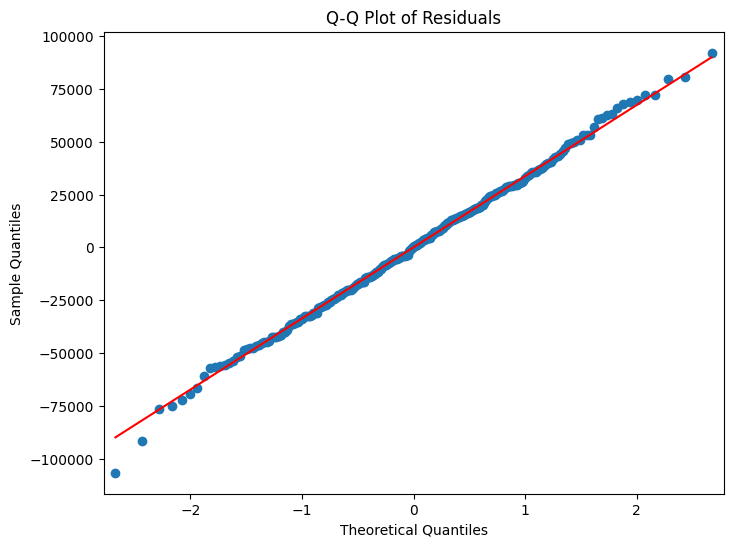

In [90]:

# Q-Q plot for residuals
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()




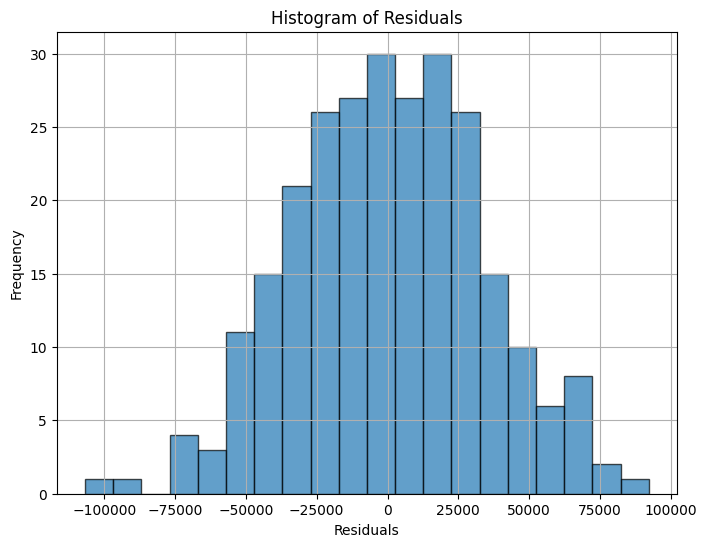

In [91]:

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Observation and Narration: Histogram of Residuals
Observation:
The histogram shows a roughly bell-shaped distribution of residuals centered around zero.
The majority of residuals fall within a symmetric range, with fewer extreme values on both ends.
The distribution is relatively smooth and does not show any irregularities or multimodal behavior.
Narration:
The histogram indicates that the residuals are approximately normally distributed. This is an important assumption in time series modeling, as normally distributed residuals suggest that the model has effectively captured the underlying patterns in the data. The residuals being centered around zero also imply that the model's predictions are unbiased. The slight variability at the extremes is expected and does not raise significant concerns about the model's validity.

This diagnostic supports the conclusion that the ARIMA model fits the data well and provides reliable forecasts.

In [92]:

# Perform Shapiro-Wilk test for normality of residuals
shapiro_test = shapiro(residuals)
shapiro_results = {
    'Test Statistic': shapiro_test[0],
    'p-value': shapiro_test[1]
}
shapiro_results





{'Test Statistic': 0.9982681285749114, 'p-value': 0.9951954036683363}

In [93]:

# Perform Shapiro-Wilk test for normality of residuals
shapiro_test = shapiro(residuals)
shapiro_results = {
    'Test Statistic': shapiro_test[0],
    'p-value': shapiro_test[1]
}
shapiro_results

{'Test Statistic': 0.9982681285749114, 'p-value': 0.9951954036683363}

Observations and Narration for the Residual Diagnostic Graphs
1. Residuals Over Time (Line Plot):
Observation: The residuals fluctuate around zero, with no clear patterns or trends over time.
Narration: This indicates that the ARIMA model has successfully captured the underlying structure of the time series. The lack of systematic patterns suggests the residuals are independent and uncorrelated.
2. Histogram of Residuals:
Observation: The histogram shows a symmetric, bell-shaped distribution.
Narration: This suggests that the residuals are approximately normally distributed, which is a key assumption for ARIMA models. The symmetry supports the idea that the model errors are unbiased.
3. Q-Q Plot of Residuals:
Observation: Most points lie close to the diagonal line, with slight deviations at the extremes.
Narration: This confirms that the residuals are roughly normally distributed. The minor deviations at the tails are not severe enough to invalidate the assumption of normality.
4. ACF of Residuals:
Observation: The ACF plot shows that most lags fall within the 95% confidence interval, with no significant spikes.
Narration: This indicates that the residuals are not autocorrelated, meaning the ARIMA model has adequately captured the autocorrelations in the data. The absence of significant autocorrelation in the residuals validates the model's performance.
Overall Assessment:
The residual diagnostic plots collectively suggest that:

The residuals are approximately normally distributed.
They do not show autocorrelation.
They fluctuate randomly around zero with no discernible patterns.
These diagnostics confirm that the ARIMA(1,0,1) model is a good fit for the data and meets the assumptions necessary for reliable forecasting